<a href="https://colab.research.google.com/github/rsetaung/thesis/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Grab the data that we need
IHO = pd.read_csv('/content/drive/MyDrive/Thesis/Incidents.csv')
IHO.head()

,Date,Country,Country ISO,Reported Perpetrator,Reported Perpetrator Name,Weapon carried or used,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,...,Health Worker Working Within National Health Structure Arrested,National Health Worker Working for Unspecified Health Provider .2,Female Health Workers Arrested or Detained,Male Health Workers Arrested or Detained,Conflict-Related Violence,Political-Related Violence,COVID-19-Related Violence,Ebola-Related Violence,Vaccination-Related Violence,SiND Event ID
0,#date,#country +name,#country +code,#group +perp,#group +perp +name,#weapon,#indicator +health_facility +destroyed +num,#indicator +health_facility +damaged +num,#indicator +health_facility +armed_entry +num,#indicator +health_facility +occupy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/08/2016,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,21047.0
2,07/01/2017,Myanmar,MMR,Police,Government of Myanmar,Not Applicable - No Direct Violence,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,Politically-related,NotApplicable,NotApplicable,NotApplicable,20779.0
3,17/09/2017,Myanmar,MMR,NSA,Unidentified Armed Actor,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28191.0
4,01/12/2017,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28200.0


In [5]:
IHO = IHO.rename(columns={'Date': 'date'})
IHO = IHO.rename(columns={'Country': 'location'})
IHO = IHO.drop(0)

IHO.head()

,date,location,Country ISO,Reported Perpetrator,Reported Perpetrator Name,Weapon carried or used,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,...,Health Worker Working Within National Health Structure Arrested,National Health Worker Working for Unspecified Health Provider .2,Female Health Workers Arrested or Detained,Male Health Workers Arrested or Detained,Conflict-Related Violence,Political-Related Violence,COVID-19-Related Violence,Ebola-Related Violence,Vaccination-Related Violence,SiND Event ID
1,16/08/2016,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,21047.0
2,07/01/2017,Myanmar,MMR,Police,Government of Myanmar,Not Applicable - No Direct Violence,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,Politically-related,NotApplicable,NotApplicable,NotApplicable,20779.0
3,17/09/2017,Myanmar,MMR,NSA,Unidentified Armed Actor,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28191.0
4,01/12/2017,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28200.0
5,05/04/2018,Myanmar,MMR,Police,Border Guard Forces (Myanmar),Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,31737.0


In [6]:
index = IHO.columns.get_loc('Conflict-Related Violence')
index

61

In [7]:
IHO['date'] = pd.to_datetime(IHO['date'])

<ipython-input-7-763204b8c77c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  IHO['date'] = pd.to_datetime(IHO['date'])


In [8]:
pd.to_datetime(IHO['date'], format='%Y-%m-%d')

1     2016-08-16
2     2017-07-01
3     2017-09-17
4     2017-01-12
5     2018-05-04
         ...    
876   2023-06-04
877   2023-09-04
878   2023-09-04
879   2023-04-17
880   2023-04-18
Name: date, Length: 880, dtype: datetime64[ns]

In [9]:
CVD = pd.read_csv('/content/drive/MyDrive/Thesis/Covid.csv')
CVD.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [10]:
CVD = CVD[CVD['location'].str.contains('Myanmar')]
CVD = CVD.fillna(0)

CVD.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
187512,MMR,Asia,Myanmar,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187513,MMR,Asia,Myanmar,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187514,MMR,Asia,Myanmar,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187515,MMR,Asia,Myanmar,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187516,MMR,Asia,Myanmar,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0


In [11]:
CVD = pd.DataFrame(CVD)

In [12]:
CVD['date'] = pd.to_datetime(CVD['date'])

In [13]:
pd.to_datetime(CVD['date'], format='%Y-%m-%d')

187512   2020-01-03
187513   2020-01-04
187514   2020-01-05
187515   2020-01-06
187516   2020-01-07
            ...    
188752   2023-05-27
188753   2023-05-28
188754   2023-05-29
188755   2023-05-30
188756   2023-05-31
Name: date, Length: 1245, dtype: datetime64[ns]

In [14]:
data = pd.merge(IHO, CVD, on = ['date'])
data.head()

,date,location_x,Country ISO,Reported Perpetrator,Reported Perpetrator Name,Weapon carried or used,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-06-02,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,No Information on the Weapon Used,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
1,2020-03-13,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,Combination,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
2,2020-12-04,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,Firearms,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
3,2020-04-20,Myanmar,MMR,NSA,Unidentified Armed Actor,Firearms,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
4,2020-04-25,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,No Information on the Weapon Used,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0


In [15]:
data.columns.tolist()

['date',
 'location_x',
 'Country ISO',
 'Reported Perpetrator',
 'Reported Perpetrator Name',
 'Weapon carried or used',
 'Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies',
 'Obstruction to health care',
 'Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Health Workers Assaulted',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted',
 'Reported Health Worker Profession',
 'Health Workers Killed.1',
 'International Health Workers Working Within The Aid System Kill',
 'International Health Worker Outside The Aid Structure Killed',
 'National Employees of International

In [16]:
IDT = ['Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies',
 'Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted']

data['IDT_total'] = data[IDT].sum(axis=1)

<ipython-input-16-bb257fdd0c7f>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['IDT_total'] = data[IDT].sum(axis=1)


In [17]:
data.columns.tolist()

['date',
 'location_x',
 'Country ISO',
 'Reported Perpetrator',
 'Reported Perpetrator Name',
 'Weapon carried or used',
 'Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies',
 'Obstruction to health care',
 'Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Health Workers Assaulted',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted',
 'Reported Health Worker Profession',
 'Health Workers Killed.1',
 'International Health Workers Working Within The Aid System Kill',
 'International Health Worker Outside The Aid Structure Killed',
 'National Employees of International

In [18]:
columns_to_delete = ['location_x',
 'Country ISO',
 'Reported Perpetrator',
 'Health Workers Assaulted',
 'Reported Perpetrator Name',
 'Weapon carried or used',
 'Obstruction to health care',
 'Reported Health Worker Profession',
 'Conflict-Related Violence',
 'Political-Related Violence',
 'COVID-19-Related Violence',
 'Ebola-Related Violence',
 'Vaccination-Related Violence',
 'SiND Event ID',
 'iso_code',
 'continent',
 'location_y',
  'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'population',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million',
'Health Workers Killed.1',
 'International Health Workers Working Within The Aid System Kill',
 'International Health Worker Outside The Aid Structure Killed',
 'National Employees of International Aid Agencies Killed',
 'National Employees of Local NGO Killed',
 'Health Worker Working Within National Health Structure Killed',
 'National Health Worker Working for Unspecified Health Provider ',
 'Health Workers Working for INGO, ICRC or UN Killed',
 'Health Workers Working for LNGO,  NGO or National Society of th',
 'Health Workers Working for local health structure killed',
 'Health Workers Killed In Captivity',
 'Female Health Workers Killed',
 'Male Health Workers Killed',
 'Health Workers Injured.1',
 'International Health Workers Working Within the Aid System Inju',
 'International Health Worker Outside the Aid Structure Injured',
 'National Employees of International Aid Agencies Injured',
 'Health Worker Working Within National Health Structure Injured',
 'National Health Worker Working For Unspecified Health Provider ',
 'Female Health Workers Injured',
 'Male Health Workers Injured ',
 'Health Workers Kidnapped.1',
 'International Health Workers Working Within the Aid System Kidn',
 'International Health Worker Outside the Aid Structure Kidnapped',
 'National Employees of International Aid Agencies Kidnapped',
 'Health Worker Working Within National Health Structure Kidnappe',
 'National Health Worker Working for Unspecified Health Provider .1',
 'Female Health Workers Kidnapped',
 'Male Health Workers Kidanpped',
 'Health Workers Arrested.1',
 'International Health Workers Working Within the Aid System Arre',
 'International Health Worker Outside the Aid Structure Arrested ',
 'National Employees of International Aid Agencies Arrested or De',
 'Health Worker Working Within National Health Structure Arrested',
 'National Health Worker Working for Unspecified Health Provider .2',
 'Female Health Workers Arrested or Detained',
 'Male Health Workers Arrested or Detained']

# Use the drop() method with the columns parameter to delete the specified columns
data.drop(columns=columns_to_delete, inplace=True)

In [19]:
data.columns.tolist()

['date',
 'Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies',
 'Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted',
 'new_cases_smoothed',
 'new_deaths_smoothed',
 'new_tests_smoothed',
 'positive_rate',
 'new_vaccinations_smoothed',
 'IDT_total']

In [20]:
pd.set_option('display.max_columns', None)
data.head()

,date,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,Health Transportation Destroyed,Health Transportation Damaged,Health Transportation Stolen/Highjacked,Looting/Theft/Robbery/Burglary of Health Supplies,Health Workers Killed,Health Workers Kidnapped,Health Workers Arrested,Health Workers Injured,Known Kidnapping/Arrest Outcome,Health Workers Threatened,Health Workers Sexually Assaulted,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,positive_rate,new_vaccinations_smoothed,IDT_total
0,2020-06-02,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,3.714,0.000,1134.0,0.0033,0.0,0.0
1,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.000,0.000,0.0,0.0000,0.0,0.0
2,2020-12-04,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,1401.857,26.000,18376.0,0.0769,0.0,2.0
3,2020-04-20,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0,0,10.000,0.143,340.0,0.0240,0.0,0.0
4,2020-04-25,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,7.143,0.000,319.0,0.0215,0.0,3.0


In [21]:
des_stats = data.describe()
des_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
Known Kidnapping/Arrest Outcome,842.0,0.681710,9.350024,0.0,0.000,0.00000,0.0000,199.0000
new_cases_smoothed,842.0,682.349160,1186.311316,0.0,18.143,139.21450,870.8570,5755.8570
new_deaths_smoothed,842.0,22.875342,62.193628,0.0,0.143,0.71400,13.4290,361.1430
new_tests_smoothed,842.0,7785.821853,8465.517551,0.0,0.000,1714.00000,15296.7500,31983.0000
positive_rate,842.0,0.049112,0.084163,0.0,0.000,0.01385,0.0503,0.3826
new_vaccinations_smoothed,842.0,77502.308789,100716.350395,0.0,0.000,19052.00000,158722.0000,366806.0000
IDT_total,842.0,0.681710,9.350024,0.0,0.000,0.00000,0.0000,199.0000


<Axes: title={'center': "Myanmar's COVID-19 fatalities"}, xlabel='date'>

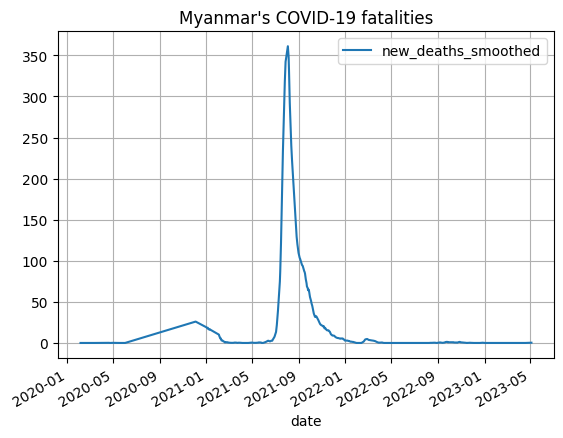

In [22]:
data.plot(x = 'date', y = 'new_deaths_smoothed', grid = True, title = "Myanmar's COVID-19 fatalities")

<Axes: title={'center': "Myanmar's incidents of healthcare obstruction"}, xlabel='date'>

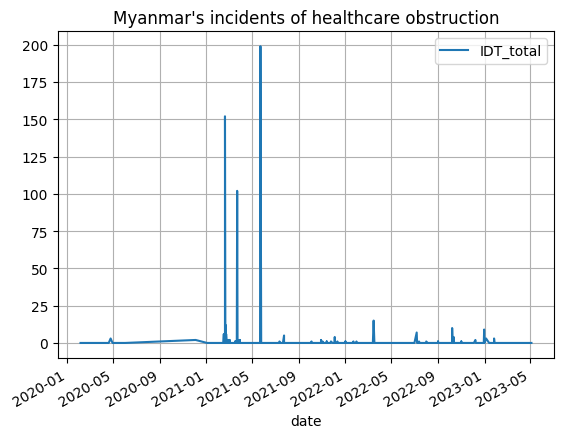

In [23]:
data.plot(x = 'date', y = 'IDT_total', grid = True, title = "Myanmar's incidents of healthcare obstruction")

In [24]:
window_size = 1
data['Moving_Avg'] = data['IDT_total'].rolling(window=window_size).mean()

<Axes: title={'center': "Myanmar's incidents of healthcare obstruction"}, xlabel='date'>

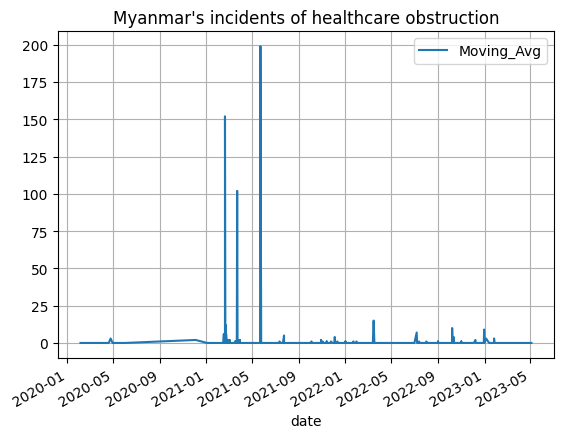

In [25]:
data.plot(x = 'date', y = 'Moving_Avg', grid = True, title = "Myanmar's incidents of healthcare obstruction")

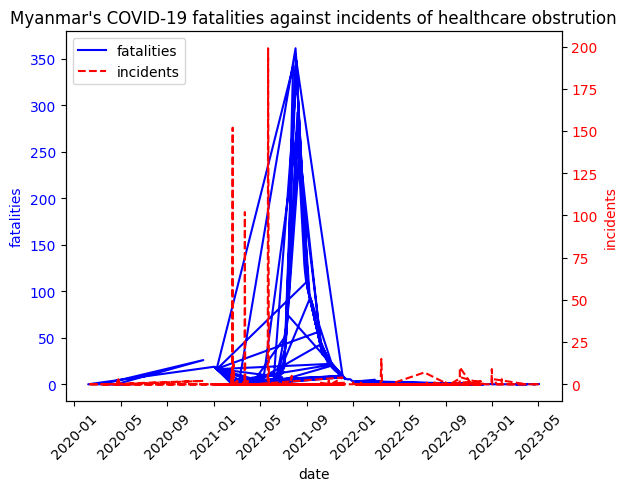

In [26]:
import matplotlib.dates as mdates

# Create the first plot
fig, ax1 = plt.subplots()

# Plot the first line on the primary y-axis
ax1.plot(data['date'], data['new_deaths_smoothed'], 'b-', label='fatalities')
ax1.set_xlabel('date')
ax1.set_ylabel('fatalities', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the second and third lines on the secondary y-axis
ax2.plot(data['date'], data['Moving_Avg'], 'r--', label='incidents')
ax2.set_ylabel('incidents', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate the x-axis labels by 45 degrees (optional)
ax1.tick_params(axis='x', rotation=45)

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.title("Myanmar's COVID-19 fatalities against incidents of healthcare obstrution")
plt.show()

In [27]:
lm = smf.ols('IDT_total ~ new_deaths_smoothed', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IDT_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4319
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.511
Time:                        19:31:42   Log-Likelihood:                -3076.2
No. Observations:                 842   AIC:                             6156.
Df Residuals:                     840   BIC:                             6166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7597      0.343      2.212      0.027       0.086       1.434
new_deaths_smoothed    -0.0034      0.005     -0.657      0.511      -0.014       0.007
==============================================================================
Omnibus:                     1823.135   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4001099.740
Skew:                          17.909   Prob(JB):                         0.00
Kurtosis:                     338.802   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from scipy import stats

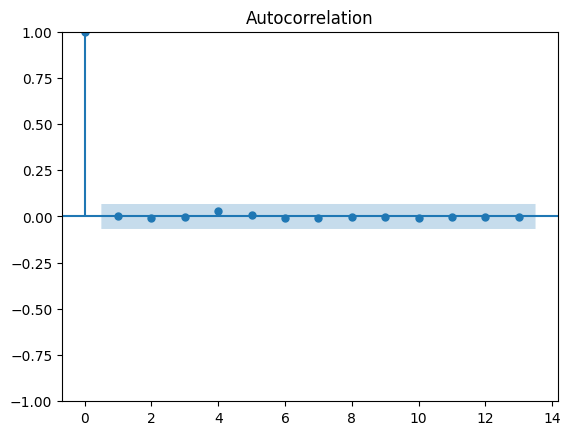

In [29]:
err = lm.resid
plot_acf(lm.resid, lags = 13);

In [30]:
print('LM test = ', durbin_watson(err))

LM test =  1.9947386773893865


In [31]:
# Breusch-Godfrey test

lmtest, pval, fval, f_pval = acorr_breusch_godfrey(lm, nlags = 10)
print('LM test =', lmtest)
print('p-value =', pval)

LM test = 1.053131692616556
p-value = 0.9997818567041756


Text(0, 0.5, 'error')

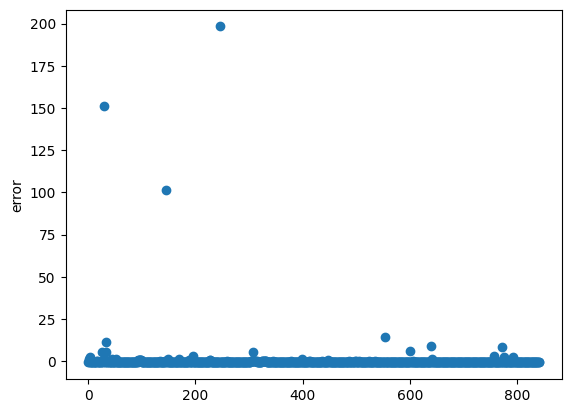

In [32]:
import pylab

err = lm.resid
pylab.scatter(err.index, err)
pylab.ylabel('error')

In [33]:
lmtest, pval, fval, f_pval = acorr_breusch_godfrey(lm, nlags = 1)
print('LM test =', lmtest)
print('p-value =', pval)

LM test = 0.0057924008931811155
p-value = 0.939333315445476


In [34]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lbvalue, pvalue = acorr_ljungbox(err, lags = 30)
print('p-values =', pvalue)

p-values = lb_pvalue


In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

data['intercept'] = 1
arima1 = SARIMAX(data['IDT_total'], order = (1, 0, 0), exog = data[['IDT_total','intercept']]).fit()
arima1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              IDT_total   No. Observations:                  842
Model:               SARIMAX(1, 0, 0)   Log Likelihood                8920.137
Date:                Thu, 10 Aug 2023   AIC                         -17832.274
Time:                        19:31:43   BIC                         -17813.331
Sample:                             0   HQIC                        -17825.014
                                - 842                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IDT_total      1.0000   3.01e-23   3.32e+22      0.000       1.000       1.000
intercept  -4.163e-17   2.83e-25  -1.47e+08      0.000   -4.16e-17   -4.16e-17
ar.L1          0.0084   1.35e-24   6.22e+21      0.000       0.008       0.008
sigma2          1e-10   6.83e-11      1.464      0.143   -3.39e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):           5919844.48
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            19.41
Prob(H) (two-sided):                  0.00   Kurtosis:                       411.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.08e+44. Standard errors may be unstable.
"""

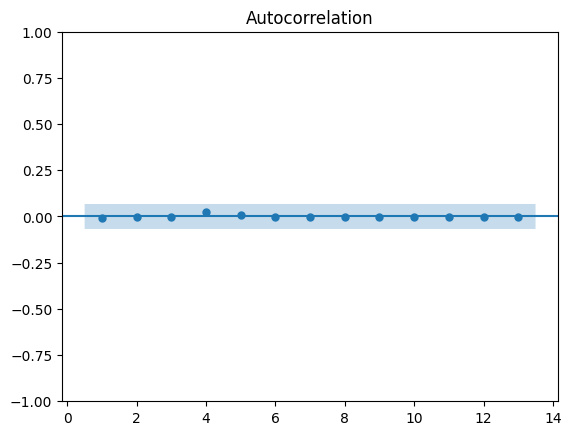

In [36]:
plot_acf(arima1.resid, lags = 13, zero = False);

In [37]:
cutoff_date = '2021-07-01'

In [38]:
data1= data[data['date'] <= cutoff_date]
constant_value = 0
data1['panelwave'] = constant_value
num_rows = data1.shape[0]

print("Number of Rows:", num_rows)

Number of Rows: 232


<ipython-input-38-7099c2e74b1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['panelwave'] = constant_value


In [39]:
data2= data[data['date'] >= cutoff_date]
constant_value = 1
data2['panelwave'] = constant_value
num_rows = data2.shape[0]

print("Number of Rows:", num_rows)

Number of Rows: 610


<ipython-input-39-b57d93de33b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['panelwave'] = constant_value


In [40]:
df = pd.concat([data1, data2], ignore_index=True)
num_rows = df.shape[0]

print("Number of Rows:", num_rows)

Number of Rows: 842


In [41]:
df['panelwave'] = df['panelwave'].astype('category')

In [42]:
pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.0 MB/s eta 0:00:00


In [43]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [44]:
sub = df.set_index(['date', 'panelwave'], drop=False)

In [45]:
index_datetime = pd.to_datetime(sub['date'])

In [46]:
sub = df.set_index(['date', 'panelwave'], drop=False)

In [47]:
by_date = df.sort_values('date')

by_date['date'] = pd.to_datetime(by_date['date'], format = "%D")
by_date = by_date.set_index('date', drop = False)

<Axes: xlabel='date'>

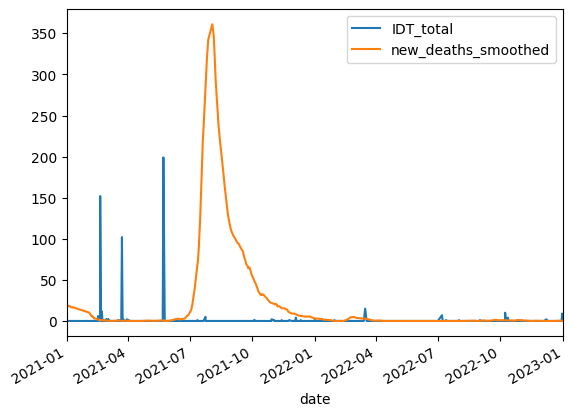

In [48]:
by_date.loc[:, ['IDT_total', 'new_deaths_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'))

In [49]:
lm_confinan = smf.ols('IDT_total ~ new_deaths_smoothed', data = by_date).fit()
lm_confinan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IDT_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4319
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.511
Time:                        19:31:52   Log-Likelihood:                -3076.2
No. Observations:                 842   AIC:                             6156.
Df Residuals:                     840   BIC:                             6166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7597      0.343      2.212      0.027       0.086       1.434
new_deaths_smoothed    -0.0034      0.005     -0.657      0.511      -0.014       0.007
==============================================================================
Omnibus:                     1823.135   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4001099.740
Skew:                          17.909   Prob(JB):                         0.00
Kurtosis:                     338.802   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from statsmodels.compat import lzip
name = ['BP', 'p-value',
        'f-value', 'f p-value']

# use results of the model we fitted earlier
test = sm.stats.diagnostic.het_breuschpagan(lm_confinan.resid, lm_confinan.model.exog)
lzip(name, test)

[('BP', 0.3180708806136414),
 ('p-value', 0.57276928789887),
 ('f-value', 0.31743528103900737),
 ('f p-value', 0.5733034025042614)]

In [51]:
err = lm_confinan.resid

from statsmodels.tsa.stattools import acf

acf(err)

array([ 1.00000000e+00, -6.74463753e-04, -3.40520799e-03,  2.17992991e-02,
        9.10990406e-03,  7.12003175e-03, -5.77082423e-03, -5.75664877e-03,
       -2.84091826e-03, -5.37695846e-03, -5.63024250e-03, -4.22459684e-03,
       -5.95909300e-03, -5.89556261e-03, -1.74984825e-03, -5.94527423e-03,
       -5.70239727e-03, -5.86929693e-03, -5.98440637e-03, -5.55704613e-03,
       -5.93474470e-03, -5.78170444e-03, -5.86007402e-03, -6.15744693e-03,
       -1.93930141e-03, -3.34809857e-03, -6.12404319e-03, -6.16908217e-03,
       -6.18861167e-03, -5.98821331e-03])

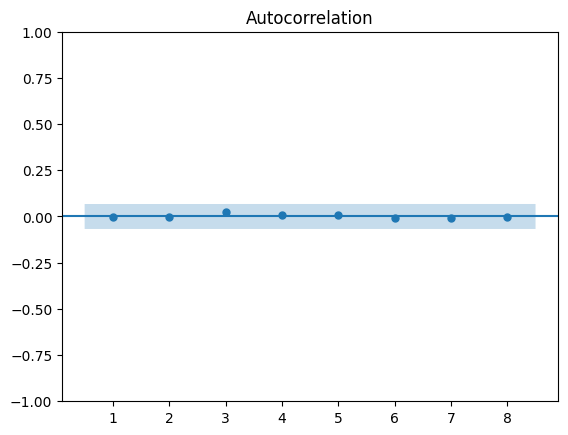

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(err, lags = 8, zero = False);

In [53]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(err)

2.0013332409250877

In [54]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

lmtest, pval, fval, f_pval = acorr_breusch_godfrey(lm_confinan, nlags = 1)
print('LM test =', lmtest)
print('p-value =', pval)

LM test = 0.0003830299444720353
p-value = 0.9843854777337959


In [55]:
lag_periods = 255  # Number of periods to shift
by_date['IDT_lag'] = by_date['IDT_total'].shift(lag_periods)

In [56]:
row_index = 254

# Retrieve all column values at the specified row index
row_values = df.iloc[row_index]

print(row_values)

date                                                            2021-07-03 00:00:00
Number of Attacks on Health Facilities Reporting Destruction                      0
Number of Attacks on Health Facilities Reporting Damaged                          0
Forceful Entry into Health Facility                                               2
Occupation of Health Facility                                                     2
Health Transportation Destroyed                                                   0
Health Transportation Damaged                                                     0
Health Transportation Stolen/Highjacked                                           0
Looting/Theft/Robbery/Burglary of Health Supplies                                 0
Health Workers Killed                                                             0
Health Workers Kidnapped                                                          0
Health Workers Arrested                                                     

In [57]:
lm_1 = smf.ols('IDT_lag ~ new_deaths_smoothed', data = by_date).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDT_lag   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.771
Date:                Thu, 10 Aug 2023   Prob (F-statistic):             0.0293
Time:                        19:31:52   Log-Likelihood:                -2246.8
No. Observations:                 587   AIC:                             4498.
Df Residuals:                     585   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4724      0.501      0.943      0.346      -0.511       1.456
new_deaths_smoothed     0.0138      0.006      2.184      0.029       0.001       0.026
==============================================================================
Omnibus:                     1189.949   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1362009.287
Skew:                          14.931   Prob(JB):                         0.00
Kurtosis:                     237.084   Cond. No.                         86.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='date'>

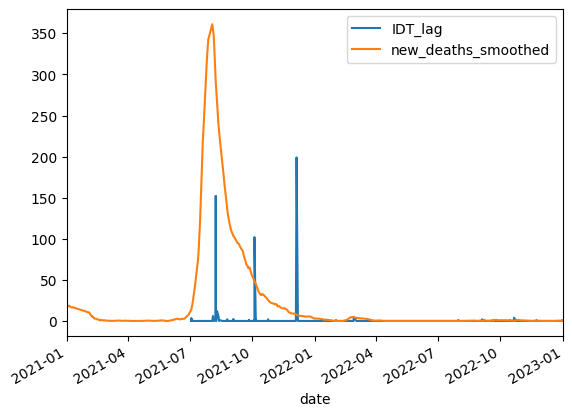

In [58]:
by_date.loc[:, ['IDT_lag', 'new_deaths_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'))

In [59]:
lm_2 = smf.ols('IDT_lag ~ new_deaths_smoothed + new_vaccinations_smoothed', data = by_date).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDT_lag   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.975
Date:                Thu, 10 Aug 2023   Prob (F-statistic):             0.0518
Time:                        19:31:53   Log-Likelihood:                -2246.2
No. Observations:                 587   AIC:                             4498.
Df Residuals:                     584   BIC:                             4512.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0002      0.663      0.000      1.000      -1.303       1.303
new_deaths_smoothed           0.0140      0.006      2.217      0.027       0.002       0.026
new_vaccinations_smoothed  4.509e-06   4.16e-06      1.085      0.278   -3.65e-06    1.27e-05
==============================================================================
Omnibus:                     1187.595   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1344823.541
Skew:                          14.869   Prob(JB):                         0.00
Kurtosis:                     235.594   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
from patsy import dmatrices
y, X = dmatrices('IDT_lag ~ new_deaths_smoothed + new_vaccinations_smoothed',
                 data = by_date, return_type = 'dataframe')

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,2.083596,Intercept
1,1.000980,new_deaths_smoothed
2,1.000980,new_vaccinations_smoothed


In [62]:
y, X = dmatrices('IDT_lag ~ new_deaths_smoothed + new_vaccinations_smoothed + new_tests_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,2.208766,Intercept
1,1.343230,new_deaths_smoothed
2,2.605740,new_vaccinations_smoothed
3,2.900623,new_tests_smoothed


In [63]:
lm_3 = smf.ols('IDT_lag ~ new_deaths_smoothed + new_vaccinations_smoothed + new_tests_smoothed', data = by_date).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDT_lag   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.022
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.110
Time:                        19:31:53   Log-Likelihood:                -2246.1
No. Observations:                 587   AIC:                             4500.
Df Residuals:                     583   BIC:                             4518.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0582      0.684      0.085      0.932      -1.284       1.401
new_deaths_smoothed           0.0153      0.007      2.093      0.037       0.001       0.030
new_vaccinations_smoothed  6.386e-06   6.71e-06      0.952      0.342   -6.79e-06    1.96e-05
new_tests_smoothed        -3.064e-05   8.59e-05     -0.356      0.722      -0.000       0.000
==============================================================================
Omnibus:                     1187.443   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1344116.932
Skew:                          14.865   Prob(JB):                         0.00
Kurtosis:                     235.533   Cond. No.                     2.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
lm_4 = smf.ols('IDT_lag ~ new_deaths_smoothed + new_cases_smoothed + new_vaccinations_smoothed + positive_rate + new_tests_smoothed', data = by_date).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDT_lag   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.723
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.127
Time:                        19:31:53   Log-Likelihood:                -2244.8
No. Observations:                 587   AIC:                             4502.
Df Residuals:                     581   BIC:                             4528.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.1940      0.692      0.280      0.780      -1.166       1.554
new_deaths_smoothed           0.0282      0.014      2.000      0.046       0.001       0.056
new_cases_smoothed           -0.0025      0.002     -1.468      0.143      -0.006       0.001
new_vaccinations_smoothed -1.393e-06   8.34e-06     -0.167      0.867   -1.78e-05     1.5e-05
positive_rate                18.6438     20.460      0.911      0.363     -21.540      58.828
new_tests_smoothed            0.0001      0.000      0.955      0.340      -0.000       0.000
==============================================================================
Omnibus:                     1184.473   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1326967.432
Skew:                          14.784   Prob(JB):                         0.00
Kurtosis:                     234.041   Cond. No.                     6.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='date'>

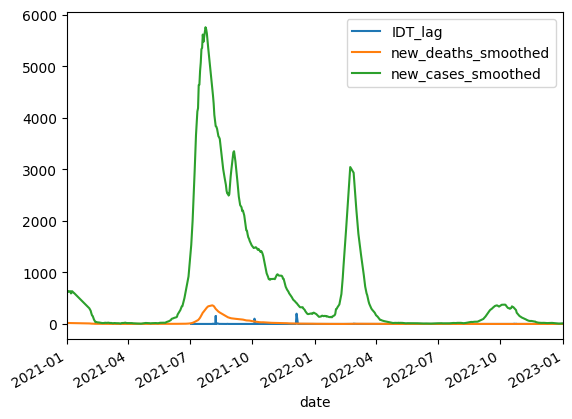

In [65]:
by_date.loc[:, ['IDT_lag', 'new_deaths_smoothed', 'new_cases_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'))

<Axes: xlabel='date'>

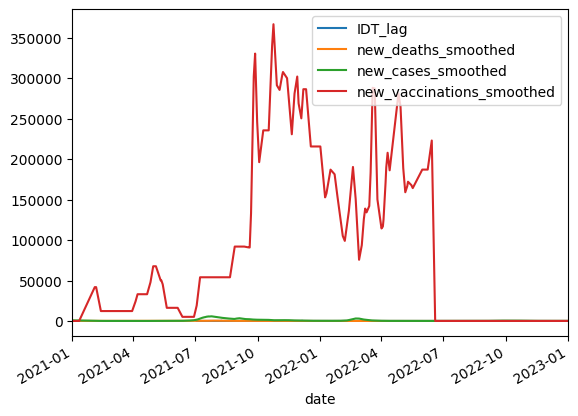

In [66]:
by_date.loc[:, ['IDT_lag', 'new_deaths_smoothed', 'new_cases_smoothed', 'new_vaccinations_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'))

<Axes: title={'center': 'Positive rate'}, xlabel='date'>

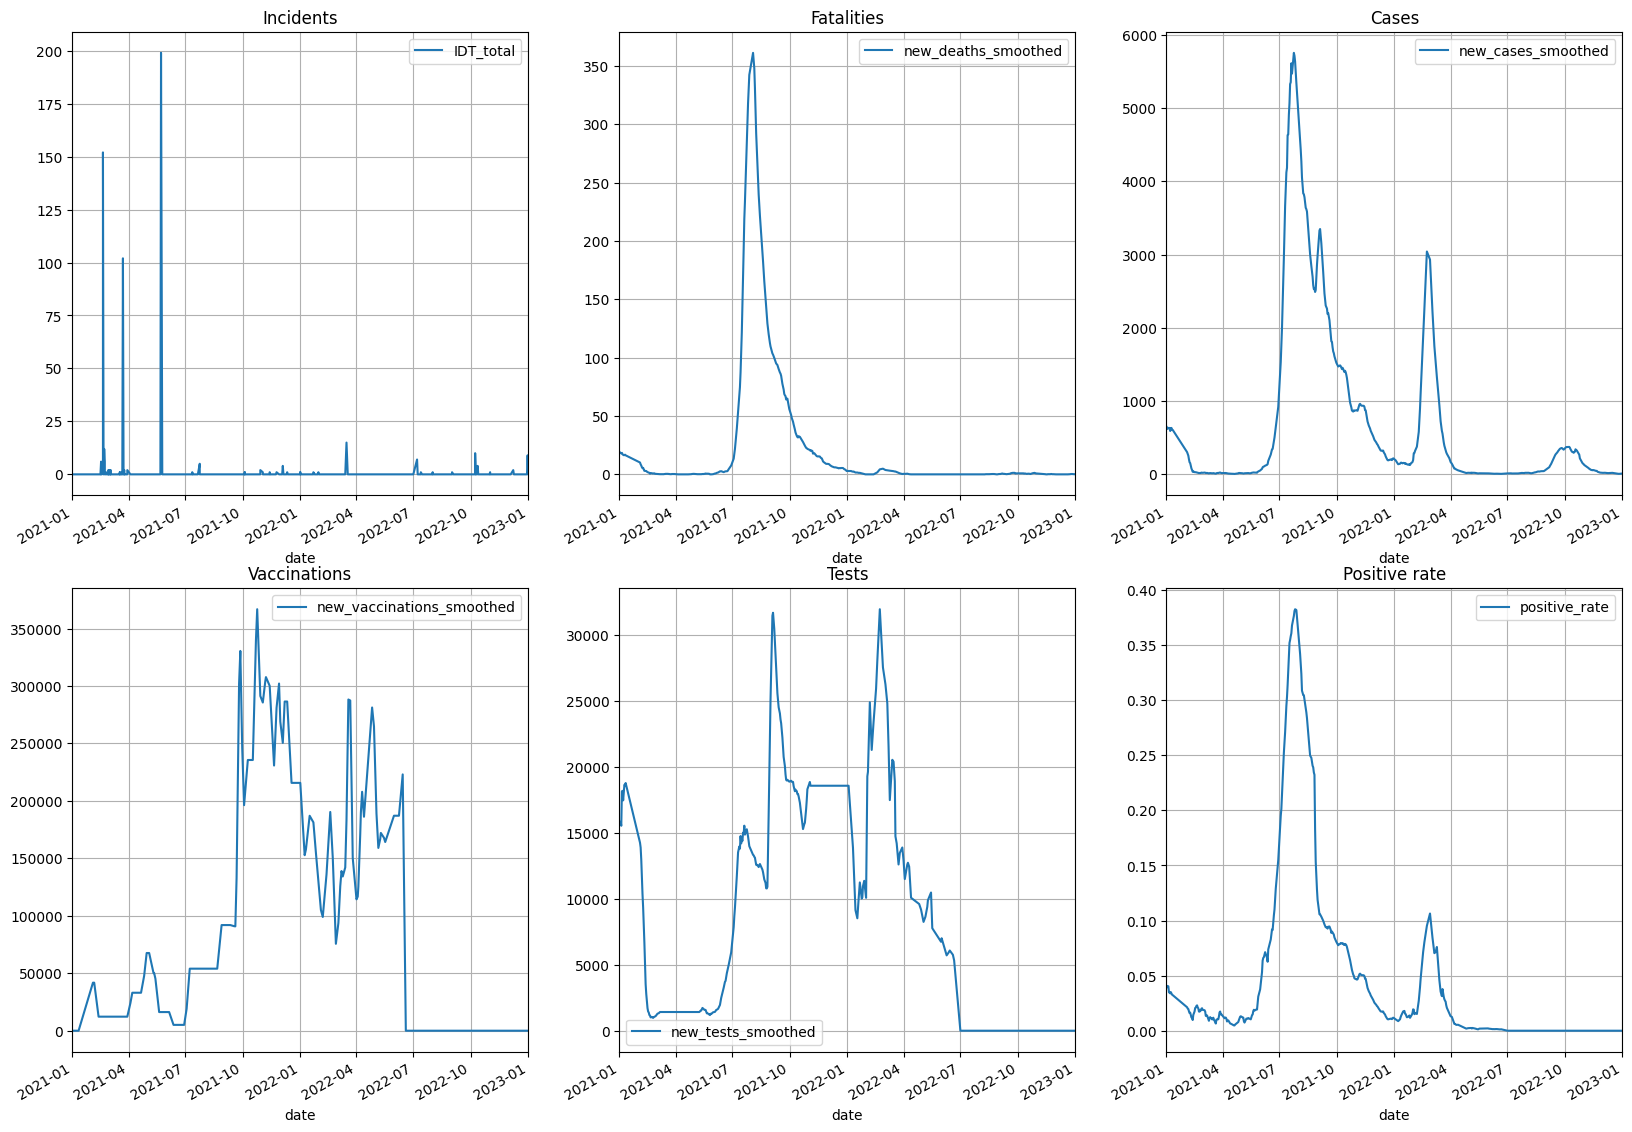

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
by_date.loc[:, ['IDT_total']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Incidents', ax = axes[0,0], grid = True)
by_date.loc[:, ['new_deaths_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Fatalities', ax = axes[0,1], grid = True)
by_date.loc[:, ['new_cases_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Cases', ax = axes[0,2], grid = True)
by_date.loc[:, ['new_vaccinations_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Vaccinations', ax = axes[1,0], grid = True)
by_date.loc[:, ['new_tests_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Tests', ax = axes[1,1], grid = True)
by_date.loc[:, ['positive_rate']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Positive rate', ax = axes[1,2], grid = True)

In [68]:
lm_3 = smf.ols('new_deaths_smoothed ~ new_vaccinations_smoothed', data = by_date).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     2.282
Date:                 Thu, 10 Aug 2023   Prob (F-statistic):              0.131
Time:                         19:31:57   Log-Likelihood:                -4670.8
No. Observations:                  842   AIC:                             9346.
Df Residuals:                      840   BIC:                             9355.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    20.3842      2.703      7.541      0.000      15.079      25.690
new_vaccinations_smoothed  3.214e-05   2.13e-05      1.511      0.131   -9.62e-06    7.39e-05
==============================================================================
Omnibus:                      697.369   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10693.310
Skew:                           3.907   Prob(JB):                         0.00
Kurtosis:                      18.612   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
lag_periods = 100  # Number of periods to shift
by_date['new_deaths_smoothed_lag'] = by_date['new_vaccinations_smoothed'].shift(lag_periods)

In [70]:
lm_4 = smf.ols('new_deaths_smoothed_lag ~ new_vaccinations_smoothed', data = by_date).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     new_deaths_smoothed_lag   R-squared:                       0.160
Model:                                 OLS   Adj. R-squared:                  0.159
Method:                      Least Squares   F-statistic:                     141.1
Date:                     Thu, 10 Aug 2023   Prob (F-statistic):           6.58e-30
Time:                             19:31:58   Log-Likelihood:                -9551.6
No. Observations:                      742   AIC:                         1.911e+04
Df Residuals:                          740   BIC:                         1.912e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  5.381e+04   4501.551     11.954      0.000     4.5e+04    6.26e+04
new_vaccinations_smoothed     0.3955      0.033     11.879      0.000       0.330       0.461
==============================================================================
Omnibus:                       84.627   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.491
Skew:                           0.856   Prob(JB):                     4.10e-22
Kurtosis:                       2.493   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y, X = dmatrices('new_deaths_smoothed_lag ~ new_vaccinations_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.687804,Intercept
1,1.000000,new_vaccinations_smoothed


In [72]:
row_index = 99

# Retrieve all column values at the specified row index
row_values = df.iloc[row_index]

print(row_values)

date                                                            2021-03-27 00:00:00
Number of Attacks on Health Facilities Reporting Destruction                      0
Number of Attacks on Health Facilities Reporting Damaged                          0
Forceful Entry into Health Facility                                               0
Occupation of Health Facility                                                     0
Health Transportation Destroyed                                                   0
Health Transportation Damaged                                                     0
Health Transportation Stolen/Highjacked                                           0
Looting/Theft/Robbery/Burglary of Health Supplies                                 0
Health Workers Killed                                                             1
Health Workers Kidnapped                                                          0
Health Workers Arrested                                                     

In [73]:
lm_5 = smf.ols('new_deaths_smoothed_lag ~ new_vaccinations_smoothed + new_cases_smoothed', data = by_date).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     new_deaths_smoothed_lag   R-squared:                       0.214
Model:                                 OLS   Adj. R-squared:                  0.212
Method:                      Least Squares   F-statistic:                     100.4
Date:                     Thu, 10 Aug 2023   Prob (F-statistic):           2.68e-39
Time:                             19:31:58   Log-Likelihood:                -9527.1
No. Observations:                      742   AIC:                         1.906e+04
Df Residuals:                          739   BIC:                         1.907e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  6.628e+04   4700.079     14.103      0.000    5.71e+04    7.55e+04
new_vaccinations_smoothed     0.4194      0.032     12.938      0.000       0.356       0.483
new_cases_smoothed          -19.2605      2.716     -7.092      0.000     -24.592     -13.929
==============================================================================
Omnibus:                       75.093   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.194
Skew:                           0.779   Prob(JB):                     8.60e-19
Kurtosis:                       2.488   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
lm_6 = smf.ols('new_deaths_smoothed_lag ~ new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed', data = by_date).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     new_deaths_smoothed_lag   R-squared:                       0.241
Model:                                 OLS   Adj. R-squared:                  0.238
Method:                      Least Squares   F-statistic:                     78.01
Date:                     Thu, 10 Aug 2023   Prob (F-statistic):           7.69e-44
Time:                             19:31:58   Log-Likelihood:                -9514.1
No. Observations:                      742   AIC:                         1.904e+04
Df Residuals:                          738   BIC:                         1.905e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  6.376e+04   4647.434     13.720      0.000    5.46e+04    7.29e+04
new_vaccinations_smoothed     0.1684      0.058      2.886      0.004       0.054       0.283
new_cases_smoothed          -33.7145      3.880     -8.689      0.000     -41.332     -26.097
new_tests_smoothed            4.3126      0.840      5.134      0.000       2.663       5.962
==============================================================================
Omnibus:                       96.517   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.283
Skew:                           0.750   Prob(JB):                     3.03e-19
Kurtosis:                       2.287   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
y, X = dmatrices('new_deaths_smoothed_lag ~ new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.984656,Intercept
1,3.389351,new_vaccinations_smoothed
2,2.134567,new_cases_smoothed
3,4.841818,new_tests_smoothed


In [76]:
y, X = dmatrices('new_deaths_smoothed_lag ~ new_vaccinations_smoothed + new_cases_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.962531,Intercept
1,1.010914,new_vaccinations_smoothed
2,1.010914,new_cases_smoothed


In [77]:
IDT_1 = ['Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies']

by_date['IDT_nonhuman'] = by_date[IDT_1].sum(axis=1)

In [78]:
IDT_2 = ['Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted']

by_date['IDT_human'] = by_date[IDT_2].sum(axis=1)

<ipython-input-78-cb61f45182d0>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  by_date['IDT_human'] = by_date[IDT_2].sum(axis=1)


In [79]:
lag_periods = 255  # Number of periods to shift
by_date['IDT_nonhuman_lag'] = by_date['IDT_nonhuman'].shift(lag_periods)

In [80]:
lag_periods = 255  # Number of periods to shift
by_date['IDT_human_lag'] = by_date['IDT_human'].shift(lag_periods)

In [81]:
lm_human = smf.ols('IDT_human_lag ~ new_deaths_smoothed', data = by_date).fit()
lm_human.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          IDT_human_lag   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.771
Date:                Thu, 10 Aug 2023   Prob (F-statistic):             0.0293
Time:                        19:31:58   Log-Likelihood:                -2246.8
No. Observations:                 587   AIC:                             4498.
Df Residuals:                     585   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4724      0.501      0.943      0.346      -0.511       1.456
new_deaths_smoothed     0.0138      0.006      2.184      0.029       0.001       0.026
==============================================================================
Omnibus:                     1189.949   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1362009.287
Skew:                          14.931   Prob(JB):                         0.00
Kurtosis:                     237.084   Cond. No.                         86.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
lm_human1 = smf.ols('IDT_human_lag ~ new_deaths_smoothed + new_vaccinations_smoothed', data = by_date).fit()
lm_human1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          IDT_human_lag   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.975
Date:                Thu, 10 Aug 2023   Prob (F-statistic):             0.0518
Time:                        19:31:58   Log-Likelihood:                -2246.2
No. Observations:                 587   AIC:                             4498.
Df Residuals:                     584   BIC:                             4512.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0002      0.663      0.000      1.000      -1.303       1.303
new_deaths_smoothed           0.0140      0.006      2.217      0.027       0.002       0.026
new_vaccinations_smoothed  4.509e-06   4.16e-06      1.085      0.278   -3.65e-06    1.27e-05
==============================================================================
Omnibus:                     1187.595   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1344823.541
Skew:                          14.869   Prob(JB):                         0.00
Kurtosis:                     235.594   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
y, X = dmatrices('IDT_human_lag ~ new_deaths_smoothed + new_vaccinations_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,2.083596,Intercept
1,1.000980,new_deaths_smoothed
2,1.000980,new_vaccinations_smoothed


In [84]:
lm_human2 = smf.ols('IDT_nonhuman_lag ~ new_deaths_smoothed', data = by_date).fit()
lm_human2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       IDT_nonhuman_lag   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1550
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.694
Time:                        19:31:58   Log-Likelihood:                -9159.2
No. Observations:                 587   AIC:                         1.832e+04
Df Residuals:                     585   BIC:                         1.833e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.834e+05   6.51e+04      4.351      0.000    1.55e+05    4.11e+05
new_deaths_smoothed  -323.7144    822.257     -0.394      0.694   -1938.649    1291.220
==============================================================================
Omnibus:                      892.014   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187100.751
Skew:                           8.680   Prob(JB):                         0.00
Kurtosis:                      88.723   Cond. No.                         86.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
lm_human2 = smf.ols('IDT_nonhuman_lag ~ new_deaths_smoothed + new_vaccinations_smoothed', data = by_date).fit()
lm_human2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       IDT_nonhuman_lag   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.397
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.248
Time:                        19:31:58   Log-Likelihood:                -9157.9
No. Observations:                 587   AIC:                         1.832e+04
Df Residuals:                     584   BIC:                         1.833e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.752e+05   8.62e+04      4.354      0.000    2.06e+05    5.44e+05
new_deaths_smoothed        -365.4696    821.510     -0.445      0.657   -1978.944    1248.005
new_vaccinations_smoothed    -0.8768      0.540     -1.624      0.105      -1.937       0.184
==============================================================================
Omnibus:                      890.030   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186738.084
Skew:                           8.640   Prob(JB):                         0.00
Kurtosis:                      88.653   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
import requests

book_url = "https://colab.research.google.com/drive/1XbeBxB15_F9xCcqPzoCRbgZYpJ6Iep9C?usp=sharing"  # Replace with the actual URL
response = requests.get(book_url)
book_content = response.text

In [128]:
latex_content = """
\\documentclass{article}
\\begin{document}
% Your processed and formatted LaTeX content here
\\end{document}
"""

with open("book.tex", "w") as tex_file:
    tex_file.write(latex_content)

In [129]:
from google.colab import files

files.download("book.tex")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
!apt-get update -y
!apt-get install -y texlive-xetex

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [130]:
!pdflatex book.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./book.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-pdftex.def)
(./book.aux) (./book.aux) )
No pages of output.
Transcript written on book.log.


In [131]:
!ls

book.aux  book.tex  mybook.aux	mybook.tex
book.log  drive     mybook.log	sample_data


In [117]:
!pwd

/content


In [118]:
!pdflatex --version

pdfTeX 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian)
kpathsea version 6.3.4/dev
Copyright 2021 Han The Thanh (pdfTeX) et al.
There is NO warranty.  Redistribution of this software is
covered by the terms of both the pdfTeX copyright and
the Lesser GNU General Public License.
For more information about these matters, see the file
named COPYING and the pdfTeX source.
Primary author of pdfTeX: Han The Thanh (pdfTeX) et al.
Compiled with libpng 1.6.37; using libpng 1.6.37
Compiled with zlib 1.2.11; using zlib 1.2.11
Compiled with xpdf version 4.03


In [120]:
!xelatex book.tex

This is XeTeX, Version 3.141592653-2.6-0.999993 (TeX Live 2022/dev/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./book.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-xetex.def
(|extractbb --version)) (./book.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd) (./book.aux) )
No pages of output.
Transcript written on book.log.


In [122]:
from google.colab import files

files.download("book.pdf")

FileNotFoundError: ignored